In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shodan import Shodan
import json
import classes

In [2]:
#api2 = Shodan('API KEY')

In [3]:
item = "Remote desktop country:'RU' product:'Remote Desktop Protocol' port:'3389'"
item2 = 'nginx/ country:"RU"'
#results_nginx = api2.search(item2)

In [25]:
results_nginx = [json.loads(line) for line in open('nginx-russia-big.json', 'r')]
results_nginx = {'matches': results_nginx, 'total': 1142822}
print('Total {} RDP adresses\nBut we will cover {} adresses'.format(results_nginx['total'],
                                                                len(results_nginx['matches'])))

Total 1142822 RDP adresses
But we will cover 1500 adresses


In [27]:
results = [json.loads(line) for line in open('rdp-russia.json', 'r')]
results = {'matches': results, 'total': 99129}
results['matches'][0] 
print('Total {} RDP adresses\nBut we will cover {} adresses'.format(results['total'],
                                                                len(results['matches'])))

Total 99129 RDP adresses
But we will cover 1500 adresses


In [36]:
i = 0
os_vuln = []
for match in results['matches']:
    i+=1
    try:
        if 'Windows 7' in match['rdp']['os']:
            a = classes.RDP_Vuln(match['ip_str'], match['port'], match['rdp']['os'],
                                 'Not covering',
                                 'Not covering',
                                 match['org'],
                                 match['location']['city'])
            os_vuln.append(a)
    except:
            print('Error occured on {} number object'.format(i)) 


In [58]:
i = 0
ssl_dhparams_vuln = []
err_inds = []
for match in results['matches']:
    i+=1
    try:
        if (match['ssl']['dhparams']['bits'] <= 1024) or (match['ssl']['dhparams'] is None):
            a = classes.RDP_Vuln(match['ip_str'], match['port'], match['rdp']['os'],
                                 match['ssl']['dhparams']['bits'],
                                 match['ssl']['cert']['pubkey']['bits'],
                                 match['org'], 
                                 match['location']['city'])
            ssl_dhparams_vuln.append(a)
    except:
        err_inds.append(i-1)
        #print('Error occured on {} number object'.format(i)) 
        
len(err_inds)

54

In [73]:
i = 0
ssl_certs_pubkey_vuln = []
for match in results['matches']:
    i+=1
    try:
        if match['ssl']['cert']['pubkey']['bits'] <= 1024:
            a = classes.RDP_Vuln(match['ip_str'], match['port'], match['rdp']['os'],
                                 match['ssl']['dhparams']['bits'],
                                 match['ssl']['cert']['pubkey']['bits'],
                                 match['org'], match['location']['city'])
            ssl_certs_pubkey_vuln.append(a)
    except:
            print('Error occured on {} number object'.format(i)) 
        
len(ssl_certs_pubkey_vuln)

Error occured on 21 number object
Error occured on 285 number object
Error occured on 540 number object
Error occured on 603 number object
Error occured on 682 number object
Error occured on 742 number object
Error occured on 810 number object
Error occured on 1033 number object
Error occured on 1162 number object


0

In [104]:
i = 0
no_ssl = []
for match in results['matches']:
    i+=1
    try:
        if 'ssl' not in match:
            a = classes.RDP_Vuln(match['ip_str'], match['port'], match['rdp']['os'],
                                 'None',
                                 'None',
                                 match['org'], match['location']['city'])
            no_ssl.append(a)
    except:
            print('Error occured on {} number object'.format(i))
            b = 2
        
len(no_ssl)

9

In [168]:
os_vuln_df = pd.DataFrame.from_records([s.to_dict() for s in os_vuln])
len(os_vuln_df)

173

Text(0, 0.5, 'Number')

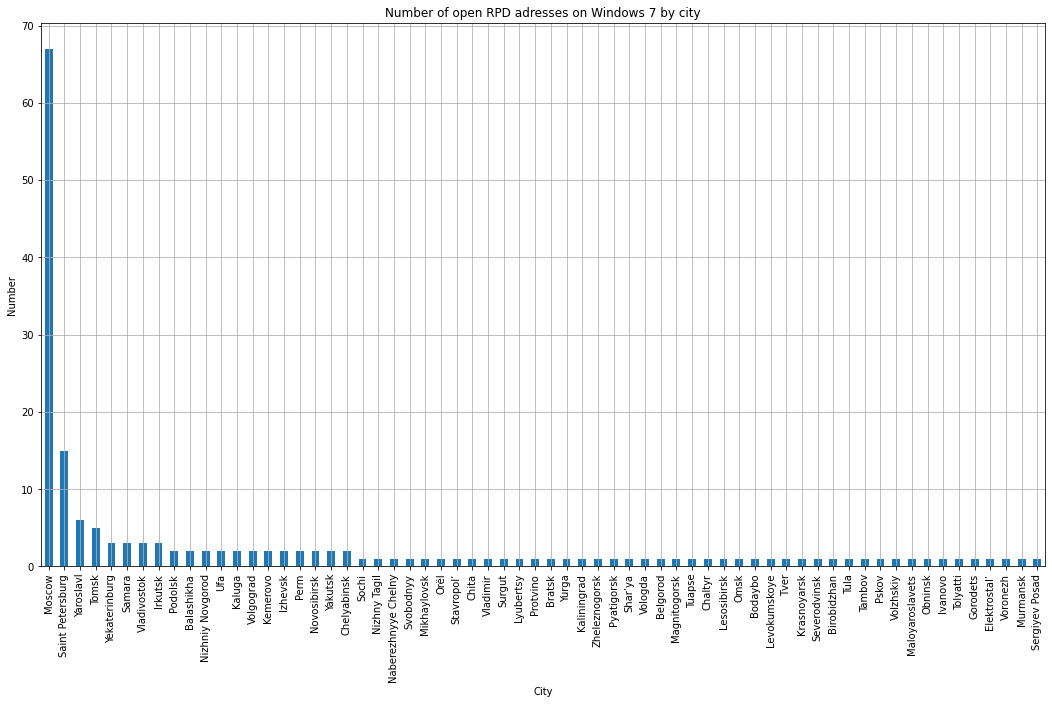

In [100]:
ax = os_vuln_df['city'].value_counts().plot(kind = 'bar',
                                            figsize = (18,10),
                                            title = 'Number of open RPD adresses on Windows 7 by city',
                                            grid = True)
ax.set_xlabel('City')
ax.set_ylabel('Number')

In [193]:
def my_level_lst(data):
    lst = []
    for i in range(len(data)):
        if (data[i]*100/np.sum(data)) > 2 :
            lst.append(os_vuln_df['city'].value_counts().index[i])
        else:
            lst.append('')
    return lst

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 2 else ''

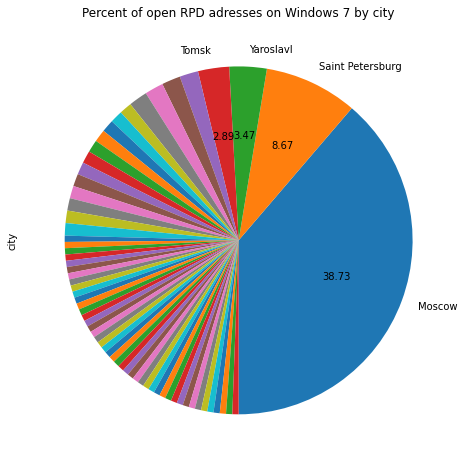

In [170]:
ax = os_vuln_df['city'].value_counts().plot(kind = 'pie',
                                            figsize = (14,8),
                                            title = 'Percent of open RPD adresses on Windows 7 by city',
                                            autopct=my_autopct,
                                            labels = my_level_lst(os_vuln_df['city'].value_counts()),
                                            startangle=270, fontsize=10)

In [155]:
os_vuln_df['city'].value_counts().index

Index(['Moscow', 'Saint Petersburg', 'Yaroslavl', 'Tomsk', 'Yekaterinburg',
       'Samara', 'Vladivostok', 'Irkutsk', 'Podolsk', 'Balashikha',
       'Nizhniy Novgorod', 'Ufa', 'Kaluga', 'Volgograd', 'Kemerovo', 'Izhevsk',
       'Perm', 'Novosibirsk', 'Yakutsk', 'Chelyabinsk', 'Sochi',
       'Nizhny Tagil', 'Naberezhnyye Chelny', 'Svobodnyy', 'Mikhaylovsk',
       'Orël', 'Stavropol’', 'Chita', 'Vladimir', 'Surgut', 'Lyubertsy',
       'Protvino', 'Bratsk', 'Yurga', 'Kaliningrad', 'Zheleznogorsk',
       'Pyatigorsk', 'Shar’ya', 'Vologda', 'Belgorod', 'Magnitogorsk',
       'Tuapse', 'Chaltyr', 'Lesosibirsk', 'Omsk', 'Bodaybo', 'Levokumskoye',
       'Tver', 'Krasnoyarsk', 'Severodvinsk', 'Birobidzhan', 'Tula', 'Tambov',
       'Pskov', 'Volzhskiy', 'Maloyaroslavets', 'Obninsk', 'Ivanovo',
       'Tolyatti', 'Gorodets', 'Elektrostal’', 'Voronezh', 'Murmansk',
       'Sergiyev Posad'],
      dtype='object')

Text(0, 0.5, 'Number')

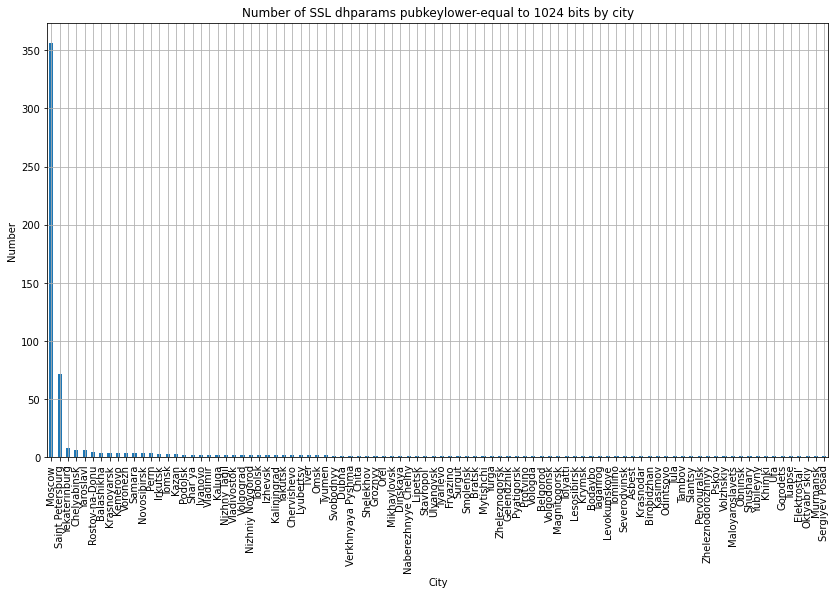

In [123]:
ssl_dhparams_vuln_df = pd.DataFrame.from_records([s.to_dict() for s in ssl_dhparams_vuln])
ax = ssl_dhparams_vuln_df['city'].value_counts().plot(kind = 'bar',
                                                      figsize = (14,8),
                                                      title = 'Number of SSL dhparams pubkey'\
                                                      'lower-equal to 1024 bits by city',
                                                      grid = True)
ax.set_xlabel('City')
ax.set_ylabel('Number')

In [171]:
len(ssl_dhparams_vuln_df)

586

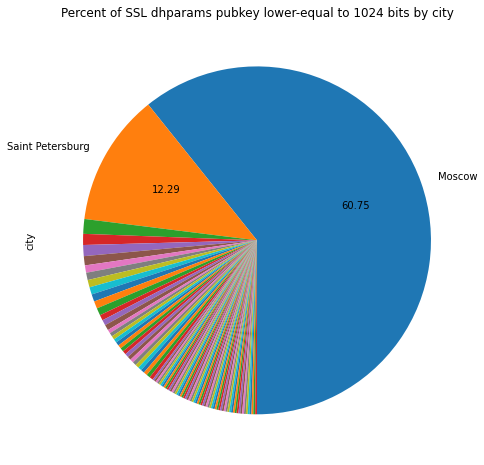

In [241]:
ax = ssl_dhparams_vuln_df['city'].value_counts().plot(kind = 'pie',
                                            figsize = (14,8),
                                            title = 'Percent of SSL dhparams pubkey '\
                                                      'lower-equal to 1024 bits by city',
                                            autopct=my_autopct,
                                            labels = my_level_lst(ssl_dhparams_vuln_df['city'].value_counts()),
                                            startangle=270, fontsize=10)

Text(0, 0.5, 'Number')

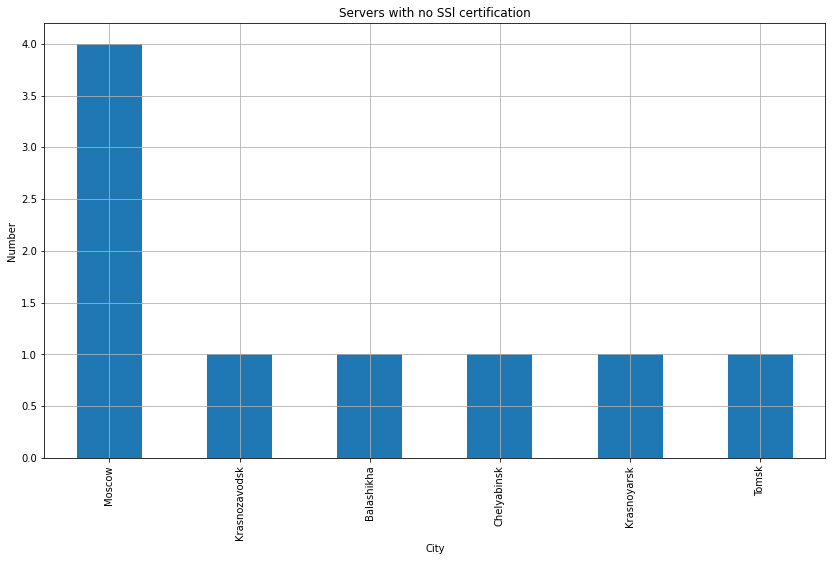

In [105]:
no_ssl_vuln_df = pd.DataFrame.from_records([s.to_dict() for s in no_ssl])
ax = no_ssl_vuln_df['city'].value_counts().plot(kind = 'bar',
                                                      figsize = (14,8),
                                                      title = 'Servers with no SSl certification',
                                                      grid = True)
ax.set_xlabel('City')
ax.set_ylabel('Number')

In [111]:
nginx_version_results = []
i = 0
for match in results_nginx['matches']:
    i+=1
    try:
        if ('http' in match) and (match['http']['server'].find('/') != -1):
            nginx_version_results.append(match)
    except:
        print('Error on object number {}'.format(i))
        
len(nginx_version_results)
print('There are {} out of 1500 nginx servers with versions'.format(len(nginx_version_results)))

There are 810 out of 1500 nginx servers with versions


In [112]:
def version_safe(ver, etalon):
    ver = ver.split(' ')[0].split('/')[1].split('.')
    etalon = etalon.split('.')
    res = True
    for i in range(min(len(ver), len(etalon))):
        if int(ver[i]) < int(etalon[i]):
            return False
    return res


i = 0
nginx_version_vuln = []
for match in nginx_version_results:
    i+=1
    try:
        if version_safe(match['http']['server'], '1.20.1') != True:
            version = match['http']['server'].split(' ')
            version = version[0].split('/')[1]
            a = classes.nginx_Vuln(match['ip_str'], match['port'],
                                   version,
                                   match['org'],match['location']['city'])
            nginx_version_vuln.append(a)
    except:
            print('Error occured on {} number object'.format(i)) 
        
print(str(len(nginx_version_vuln)) + ' vulnarable versions of nginx')

Error occured on 23 number object
Error occured on 468 number object
641 vulnarable versions of nginx


In [115]:
nginx_vuln_df = pd.DataFrame.from_records([s.to_dict() for s in nginx_version_vuln])

Text(0, 0.5, 'Number')

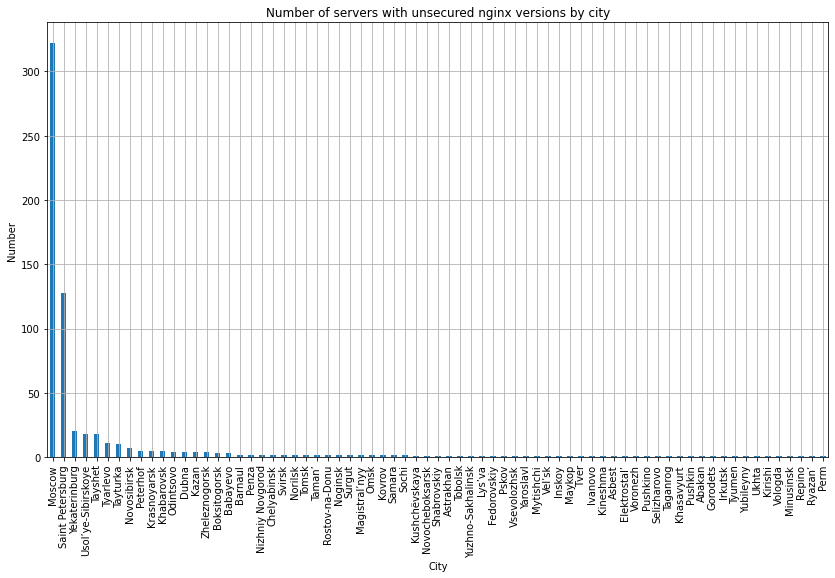

In [116]:
ax = nginx_vuln_df['city'].value_counts().plot(kind = 'bar',
                                                figsize = (14,8),
                                                title = 'Number of servers with unsecured'\
                                               ' nginx versions by city',
                                                grid = True)
ax.set_xlabel('City')
ax.set_ylabel('Number')

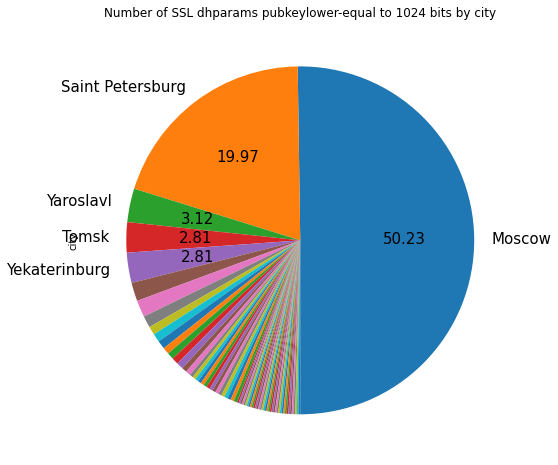

In [175]:
ax = nginx_vuln_df['city'].value_counts().plot(kind = 'pie',
                                            figsize = (14,8),
                                            title = 'Number of SSL dhparams pubkey'\
                                                      'lower-equal to 1024 bits by city',
                                            autopct=my_autopct,
                                            labels = my_level_lst(nginx_vuln_df['city'].value_counts()),
                                            startangle=270, fontsize=15)

In [173]:
moscow = nginx_vuln_df['city'].value_counts()['Moscow']
print('Moscow vulnarable nginx servers take {}% of all servers in Russia covered by me'.format(round(moscow / len(
    results_nginx['matches']) * 100, 3)))

Moscow vulnarable nginx servers take 21.467% of all servers in Russia covered by me


There are 929 out of 11052723 servers with default login and password in Russia
Distribution by city is on a chart below


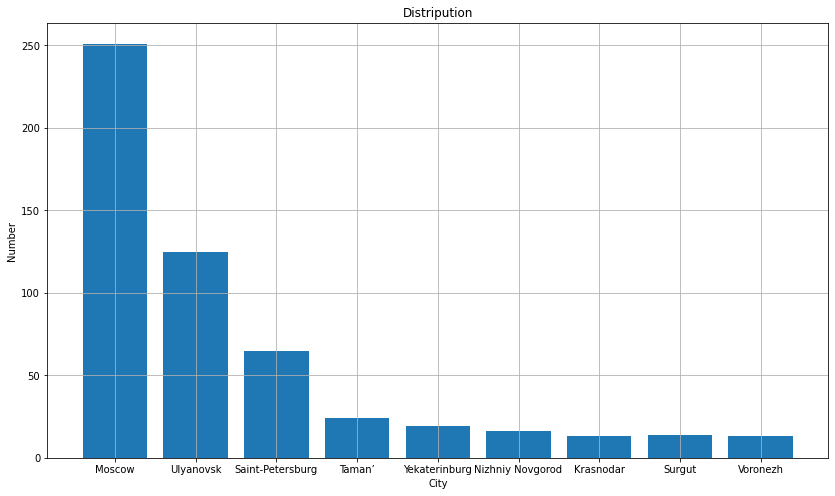

In [177]:
import re
lines = []
with open("default-pswd.txt", "r") as read_file:
    lines = read_file.readlines()
    read_file.close()
 

def_pass_vul = []
for line in lines:
    tmp = line.split(':')
    def_pass_vul.append({
        'City': tmp[0],
        'Number': int(tmp[1].replace('\n', '')),
    })


plt.figure(figsize = (14,8))
plt.bar([data['City'] for data in def_pass_vul],
             [data['Number'] for data in def_pass_vul])
plt.grid(True)
plt.title('Distripution')
plt.xlabel('City')
plt.ylabel('Number')

print('There are {} out of {} servers with default login and password in Russia'.format(929, 11052723))
print('Distribution by city is on a chart below')

plt.show()

In [238]:
defaul_password_df = pd.DataFrame(def_pass_vul)
list(defaul_password_df['City'])
np.sum(defaul_password_df)['Number']
for i in list(defaul_password_df['City']):
    print((defaul_password_df.set_index('City').loc[i]*100/np.sum(defaul_password_df)['Number'])['Number'] > 4, i)
    
my_level_lst_tmp(defaul_password_df)

True Moscow
True Ulyanovsk
True Saint-Petersburg
True Taman’
False Yekaterinburg
False Nizhniy Novgorod
False Krasnodar
False Surgut
False Voronezh


['Moscow', 'Ulyanovsk', 'Saint-Petersburg', 'Taman’', '', '', '', '', '']

<AxesSubplot:title={'center':'Percentage of default login password auth. services'}, ylabel='Number'>

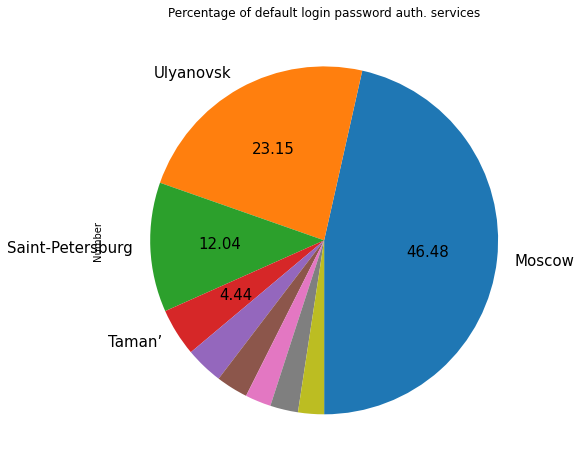

In [240]:
def my_level_lst_tmp(data):
    lst = []
    for i in list(data['City']):
        if (data.set_index('City').loc[i]*100/np.sum(data)['Number'])['Number'] > 4 :
            lst.append(i)
        else:
            lst.append('')
    return lst

def my_autopct_tmp(pct):
    return ('%.2f' % pct) if pct > 4 else ''

defaul_password_df.plot.pie(y='Number', figsize = (14,8),
                                            title = 'Percentage of default login password auth. services',
                                            autopct=my_autopct_tmp,
                                            labels = my_level_lst_tmp(defaul_password_df),
                                            startangle=270, fontsize=15, legend = False)